# Inference

## weight, log 불러오기

In [ ]:
## 불러올 weight,log를 저장할 폴더 생성
!mkdir load_data

In [ ]:
cd /content/load_data # 현재 경로 확인

/content/load_data


In [ ]:
# weight
!gdown 1--AJWPNySIn7nwExSkp-BrOVBzhw-BAi
# csv
!gdown 1-7eEF6Ji9HRDOM3TvOwxIyt0YR9SN1y1

Downloading...
From: https://drive.google.com/uc?id=1--AJWPNySIn7nwExSkp-BrOVBzhw-BAi
To: /content/load_data/ORG_Dataset.pt
100% 245M/245M [00:01<00:00, 231MB/s]


In [ ]:
# 사용할 library import
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os

In [ ]:
w_list = [_ for _ in os.listdir('/content/load_data') if _.endswith(r".pt")] #  str.endswith(접미사[, start [,end]]) : 정의된 문자열이 지정된 접미사로 끝나면 True를 돌려줌
csv_list = [_ for _ in os.listdir('/content/load_data') if _.endswith(r".csv")]

In [ ]:
w_list

['ORG_Dataset.pt']

In [ ]:
# Load the trained model 
model = torch.load(f'./{w_list[0]}')
# Set the model to evaluate mode
model.eval()

## best weight ( min Loss 기준 ) log 확인

In [ ]:
# Read the log file using pandas into a dataframe
df = pd.read_csv(f'./{csv_list[0]}')
df[df['Test_loss'] == df['Test_loss'].min()]

,epoch,Train_loss,Test_loss,Train_f1_score,Train_auroc,Train_iou,Test_f1_score,Test_auroc,Test_iou
6,7,0.011594,0.02949,0.62794,0.971545,0.498737,0.539537,0.822237,0.426958


## best weight visualizing with Plot

In [ ]:
# Plot all the values with respect to the epochs
drop_loss = df.drop(columns=['Train_loss', 'Test_loss'], axis=1)
loss_df = df[df.columns[:3]]

In [ ]:
column_list = list(drop_loss.columns[1:])
color_list = ['red', 'orange', 'black', 'green', 'blue', 'purple']

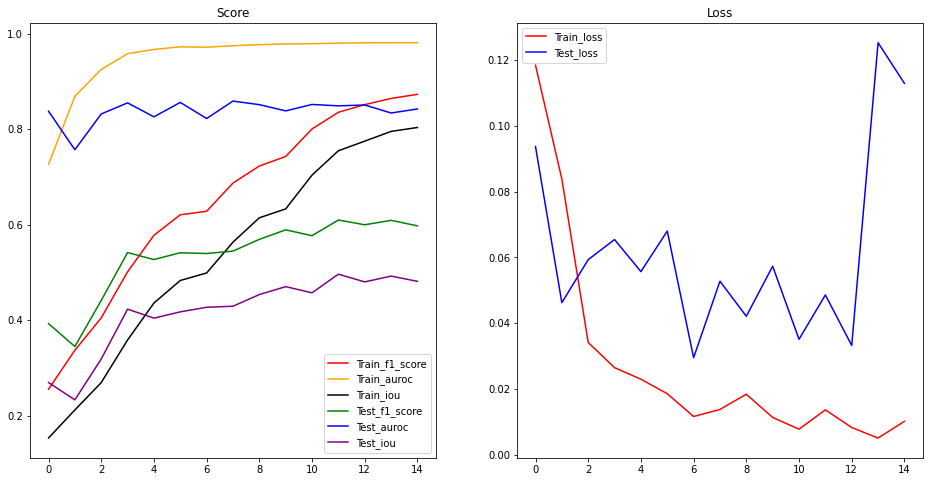

In [ ]:
fig = plt.figure(figsize=(16, 8))


ax = fig.add_subplot(1, 2, 1)
for color, column in zip(color_list, column_list):
    ax.plot(drop_loss[column], color=color, label=column)
ax.title.set_text("Score")
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(loss_df["Train_loss"], color="red", label="Train_loss")
ax.plot(loss_df["Test_loss"], color="blue", label="Test_loss")
ax.title.set_text("Loss")
ax.legend()

plt.show()

## Prediction Visualizing

### Ground Truth, Prediction 비교

In [ ]:
## trainset image, ground truth, prediction을 visualizing을 통해 비교
# Read  a sample image and mask from the data-set
img = cv2.imread('/content/a_03.jpg')
img_plot = img.transpose(2,0,1).reshape(1,3,img.shape[0], img.shape[1])
mask = cv2.imread('/content/a_03_m.jpg')
with torch.no_grad():
    a = model(torch.from_numpy(img_plot).type(torch.cuda.FloatTensor)/255)

(array([125838., 106565.,  15287.,   5355.,   3015.,   2531.,   1657.,
           935.,    548.,    413.]),
 array([-0.14668296, -0.04470035,  0.05728226,  0.15926486,  0.2612475 ,
         0.36323008,  0.4652127 ,  0.5671953 ,  0.6691779 ,  0.77116054,
         0.87314314], dtype=float32),
 <a list of 10 Patch objects>)

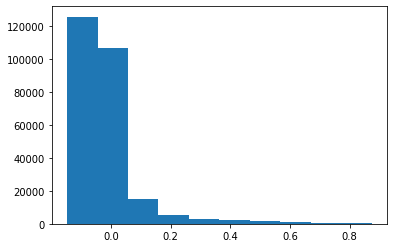

In [ ]:
# Plot histogram of the prediction to find a suitable threshold. From the histogram a 0.1 looks like a good choice.
plt.hist(a['out'].data.cpu().numpy().flatten())

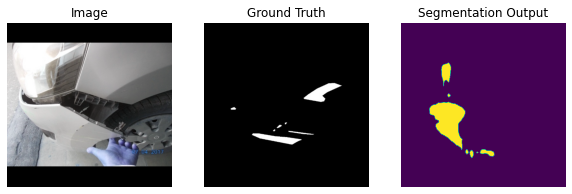

In [ ]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(131);
plt.imshow(img_plot[0,...].transpose(1,2,0));
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);
plt.imshow(a['out'].cpu().detach().numpy()[0][0]>0.2);
plt.title('Segmentation Output')
plt.axis('off');
# plt.savefig('./CFExp/SegmentationOutput.png',bbox_inches='tight')

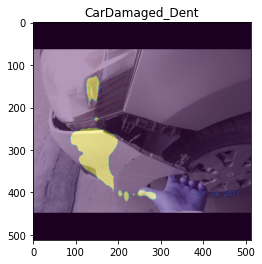

In [ ]:
## image와 prediction을 겹쳐서 visualizing
plt.imshow(img)
plt.imshow(a['out'].cpu().detach().numpy()[0][0]>0.2, alpha=0.4);
plt.title('CarDamaged_Dent')
plt.show()

### Testset Visualizing

In [ ]:
test_img = cv2.imread('/content/test2.jpg')
test_img.shape

(360, 360, 3)

In [ ]:
# ino = 2
# Read  a sample image and mask from the data-set
img = cv2.imread('/content/test2.jpg').transpose(2,0,1).reshape(1,3,360, 360)
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.cuda.FloatTensor)/255)

(array([36202., 66510.,  6389.,  2436.,  1644.,  1486.,  1600.,  2285.,
         9964.,  1084.]),
 array([-0.15517703, -0.02877913,  0.09761877,  0.22401667,  0.35041457,
         0.47681248,  0.6032104 ,  0.72960824,  0.85600615,  0.98240405,
         1.108802  ], dtype=float32),
 <a list of 10 Patch objects>)

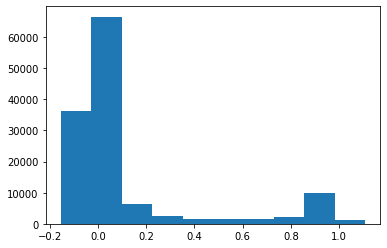

In [ ]:
plt.hist(a['out'].data.cpu().numpy().flatten())

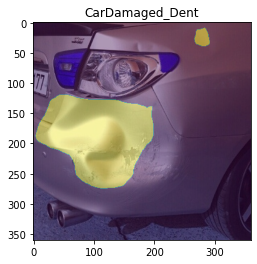

In [ ]:
img = cv2.imread('/content/test2.jpg')
plt.imshow(img)
plt.imshow(a['out'].cpu().detach().numpy()[0][0]>0.2, alpha=0.4);
plt.title('CarDamaged_Dent')
plt.show()